** A kernel designed to showcase data vizualisation skills with matplotlib and seaborn. 

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from matplotlib import animation
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings 
import folium
import folium.plugins
from matplotlib.animation import FuncAnimation, PillowWriter 
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap

In [304]:
df=pd.read_csv('terrorism.csv', encoding='latin1')

In [305]:
df.shape 

(181691, 135)

Too many columns, find ways to narrow. First identify columns with too many NA values.

In [306]:
df=df.loc[:,df.isna().sum() < .2*df.shape[0]]
df.shape

(181691, 47)

Still too many columns. identify columns with alot of unique values and drop them. Also rename and create some new columns. 

In [307]:
df.nunique()

eventid               576
iyear                  47
imonth                 13
iday                   32
extended                2
country               205
country_txt           205
region                 12
region_txt             12
provstate            2855
city                36674
latitude            48322
longitude           48039
specificity             5
vicinity                3
crit1                   2
crit2                   2
crit3                   2
doubtterr               3
multiple                2
success                 2
suicide                 2
attacktype1             9
attacktype1_txt         9
targtype1              22
targtype1_txt          22
targsubtype1          112
targsubtype1_txt      112
target1             86006
natlty1               215
natlty1_txt           215
gname                3537
guncertain1             2
individual              2
weaptype1              12
weaptype1_txt          12
weapsubtype1           30
weapsubtype1_txt       30
nkill       

In [308]:
#dropping 
df.drop(['specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 
        'attacktype1', 'targtype1', 'targsubtype1', 'natlty1_txt', 'guncertain1', 'individual', 'weaptype1', 
        'weapsubtype1', 'weapsubtype1_txt', 'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
        'INT_ANY'], axis=1, inplace=True) 

#renaming
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'city':'City', 'region_txt':'RegionName',
                    'provstate':'state', 'attacktype1_txt':'TypeOfAttack', 'targtype1_txt':'TypeOfTarget', 
                   'weaptype1_txt':'TypeOfWeapon', 'nkill':'Killed', 'nwound':'Wounded'}, inplace=True)

#replace NaN with 0
df['Killed']=df['Killed'].fillna(0)
df['Wounded']=df['Wounded'].fillna(0)

#new column
df['Casualties']=df['Killed']+df['Wounded']

df.head()

,eventid,Year,Month,Day,extended,country,Country,region,RegionName,state,...,TypeOfAttack,TypeOfTarget,targsubtype1_txt,target1,natlty1,gname,TypeOfWeapon,Killed,Wounded,Casualties
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,58.0,MANO-D,Unknown,1.0,0.0,1.0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,217.0,Unknown,Unknown,1.0,0.0,1.0
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,217.0,Unknown,Explosives,0.0,0.0,0.0
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,217.0,Unknown,Incendiary,0.0,0.0,0.0


In [309]:
regions = list(set(df.RegionName))

region_mean_kills = []
for region in regions:
    region_mean_kills.append(df.Killed[df.RegionName == region].mean())
    
def mapmean(row):
    for i, region in enumerate(regions):
        return region_mean_kills[i]

for i, region in enumerate(regions):
    print('{}:{}'.format(region, round(region_mean_kills[i],2)))

Southeast Asia:1.25
South America:1.52
Central Asia:1.78
North America:1.42
Western Europe:0.4
Middle East & North Africa:2.73
Sub-Saharan Africa:4.47
South Asia:2.25
Australasia & Oceania:0.53
Eastern Europe:1.44
Central America & Caribbean:2.78
East Asia:1.44


In [310]:
df.shape

(181691, 23)

That's a workable number of columns. Let's do some EDA. 

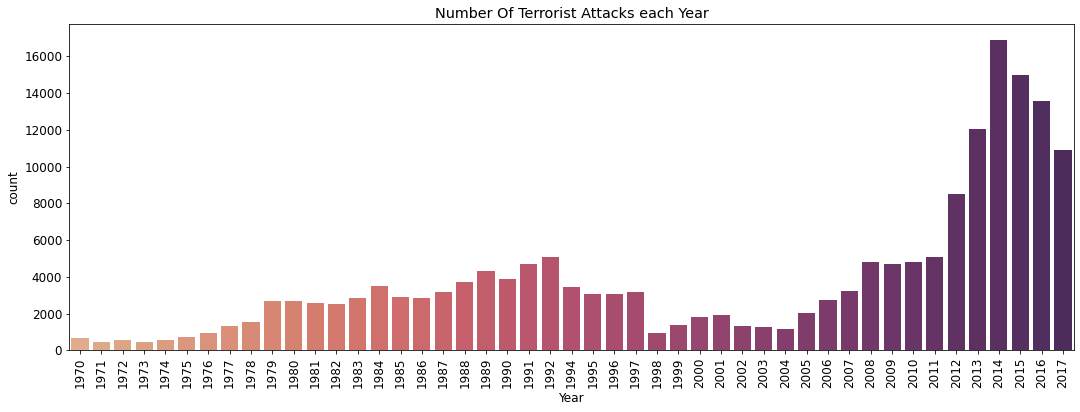

In [311]:
plt.subplots(figsize=(18,6))
sns.countplot(data=df, 
              x='Year', 
              palette='flare'
             )
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks each Year')
plt.show()

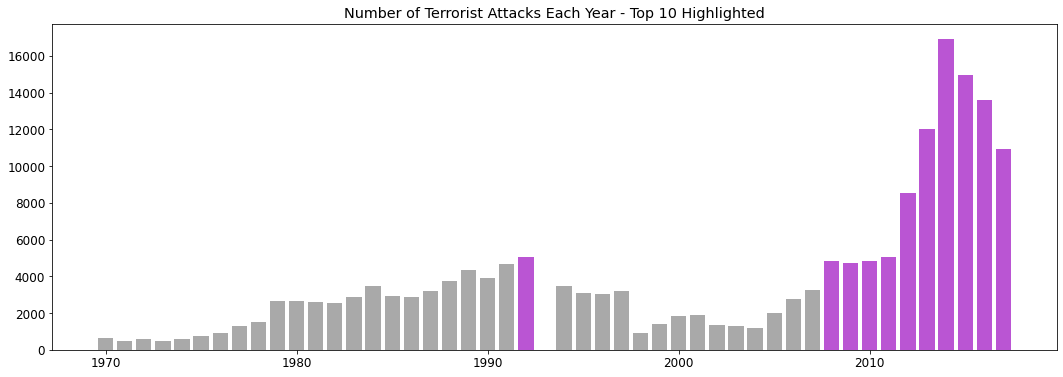

(4683, 23)

In [312]:
values = df['Year'].value_counts()
clrs = ['darkgrey' if (x < (df['Year'].value_counts().tolist()[10])) else 'mediumorchid' for x in values]

plt.figure(figsize=(18,6))
plt.bar(
    df['Year'].value_counts().index, 
    df['Year'].value_counts(), 
    color=clrs
)
plt.title('Number of Terrorist Attacks Each Year - Top 10 Highlighted')
plt.show()
df1=df.groupby(['Year']).get_group(1991)
df2=df.groupby(['Year']).get_group(2009)
df1.shape

#show every year. 

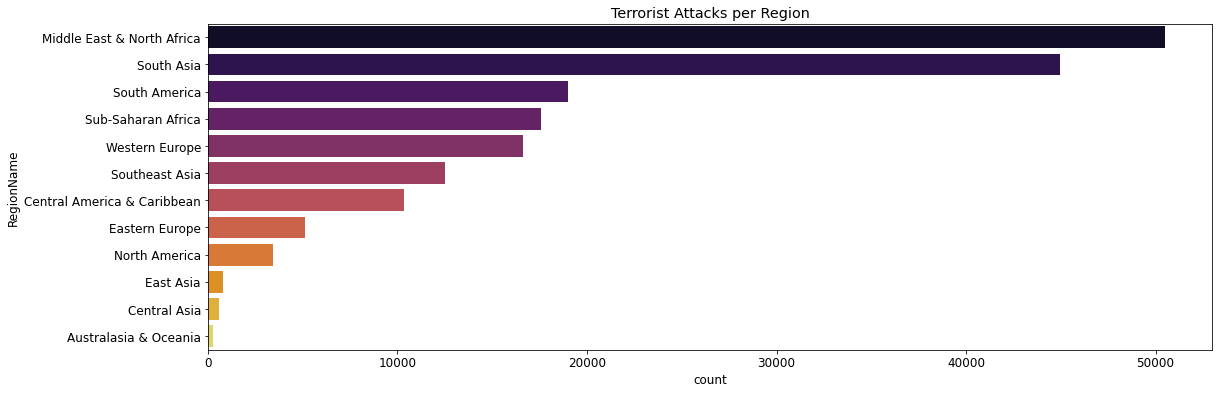

In [313]:
plt.subplots(figsize=(18,6))
sns.countplot(data=df, 
              y='RegionName', 
              palette='inferno', 
              order=df['RegionName'].value_counts().index
             )
plt.title('Terrorist Attacks per Region')
plt.show()

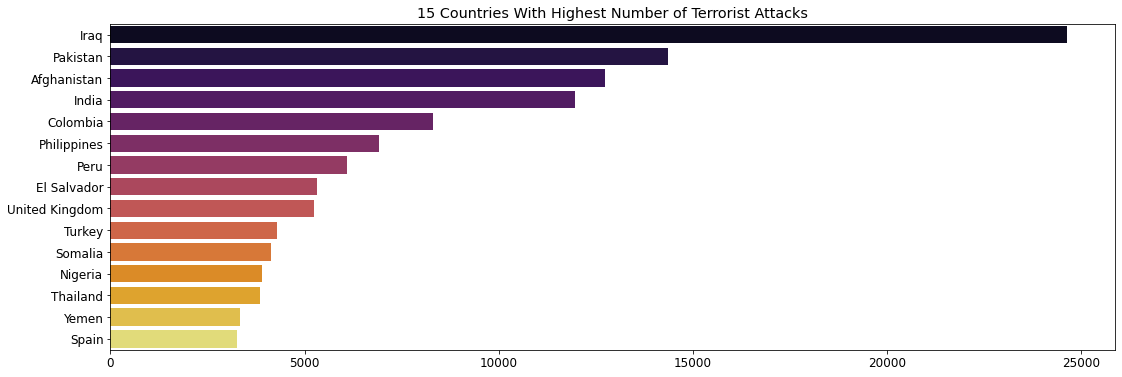

In [314]:
plt.subplots(figsize=(18,6))
sns.barplot(data=df,
            x=df['Country'].value_counts()[:15].values, 
            y=df['Country'].value_counts()[:15].index,
            palette='inferno'
           )
plt.title('15 Countries With Highest Number of Terrorist Attacks')
plt.show()
#group them now by 'region' then do it via region to demonstrate. would like to assign a colour to each country's region.
#can tell certain regions will come up with most number of activities. 

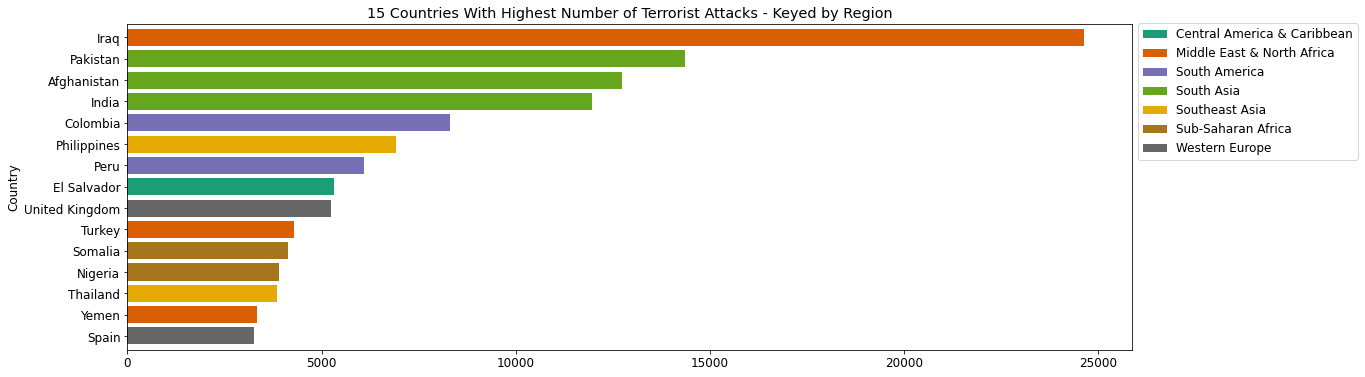

In [315]:
#PIVOT
dfTerrorAttackbyCountry_Region1=pd.crosstab(df.Country,df.RegionName)
#FIND TOTAL FOR ORDERING PURPOSES
dfTerrorAttackbyCountry_Region1['Total']= dfTerrorAttackbyCountry_Region1[list(dfTerrorAttackbyCountry_Region1.columns)].sum(axis=1)
dfTerrorAttackbyCountry_Region1=dfTerrorAttackbyCountry_Region1.sort_values(by=['Total'], ascending=True).drop(['Total'], axis=1).tail(15)
#REMOVE REGIONS WITH NO DATA
dfTerrorAttackbyCountry_Region1=dfTerrorAttackbyCountry_Region1[dfTerrorAttackbyCountry_Region1.columns[dfTerrorAttackbyCountry_Region1.sum()>0]]
#CHARTING
dfTerrorAttackbyCountry_Region1.plot(kind='barh', 
         figsize=(18, 6), 
         stacked=True,
         cmap='Dark2',
         width=.8
         )
plt.title('15 Countries With Highest Number of Terrorist Attacks - Keyed by Region')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()


Regions which don't contain countries in the top 15 Terrorist Attacks. 

In [316]:
print(list(set(df.RegionName.unique().tolist()) - set(dfTerrorAttackbyCountry_Region1.columns.tolist())))

['Central Asia', 'North America', 'Australasia & Oceania', 'Eastern Europe', 'East Asia']


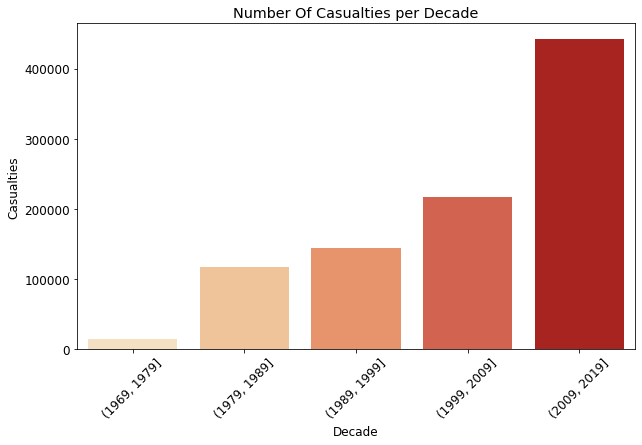

         Decade  Casualties
0  (1969, 1979]     15188.0
1  (1979, 1989]    117073.0
2  (1989, 1999]    143969.0
3  (1999, 2009]    217167.0
4  (2009, 2019]    442340.0


In [317]:
dfCasualtiesbyDecade = df
bins = [1969, 1979, 1989, 1999, 2009, 2019]
dfCasualtiesbyDecade['Decade'] = pd.cut(dfCasualtiesbyDecade['Year'], bins)
dfCasualtiesbyDecade=dfCasualtiesbyDecade.groupby('Decade').sum().reset_index()

plt.subplots(figsize=(10,6))
plt.xticks(rotation=45)
plt.title('Number Of Casualties per Decade')
sns.barplot(
    y='Casualties',
    x='Decade', 
    data=dfCasualtiesbyDecade,
    palette= 'OrRd')
plt.show()

print(dfCasualtiesbyDecade[['Decade', 'Casualties']].head())


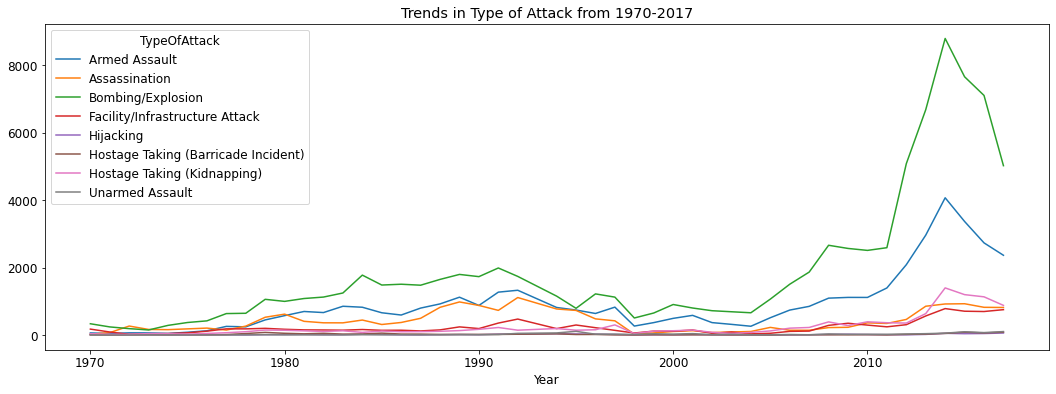

TypeOfAttack,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
Year,,,,,,,,
2013,2962,853,6685,564,17,26,634,39
2014,4071,920,8799,783,49,46,1397,54
2015,3368,927,7662,705,38,82,1197,95
2016,2733,821,7108,696,43,61,1132,71
2017,2365,816,5024,751,58,82,878,101


In [318]:
dfTypeofAttack=pd.crosstab(df.Year,df.TypeOfAttack).drop(['Unknown'], axis=1)
dfTypeofAttack.plot(figsize=(18, 6), 
           )
plt.title('Trends in Type of Attack from 1970-2017')
plt.show()
dfTypeofAttack.tail()

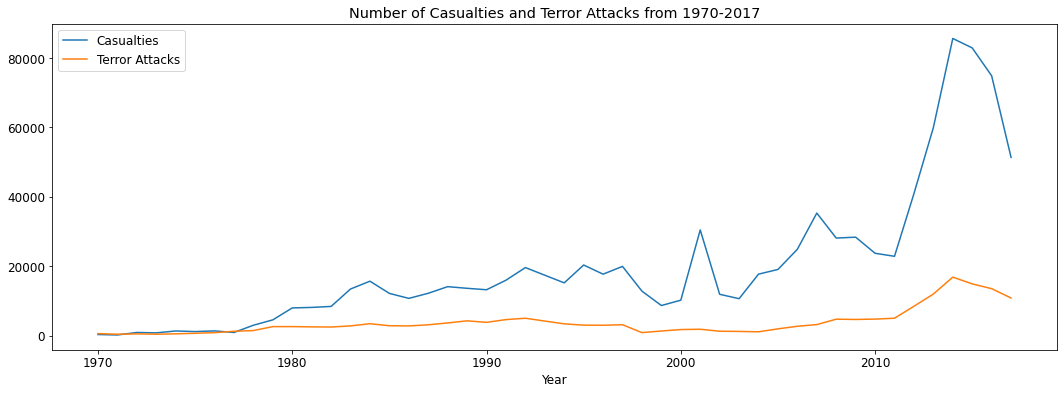

In [319]:
dfCasualtiesandTerrorAttacks=df.groupby('Year')['Casualties'].sum().reset_index()
dfCasualtiesandTerrorAttacks['Terror Attacks'] = df.Year.value_counts().sort_index().values
dfCasualtiesandTerrorAttacks=dfCasualtiesandTerrorAttacks.set_index('Year')

dfCasualtiesandTerrorAttacks.plot(figsize=(18, 6),           
           )
plt.title('Number of Casualties and Terror Attacks from 1970-2017')
plt.show()

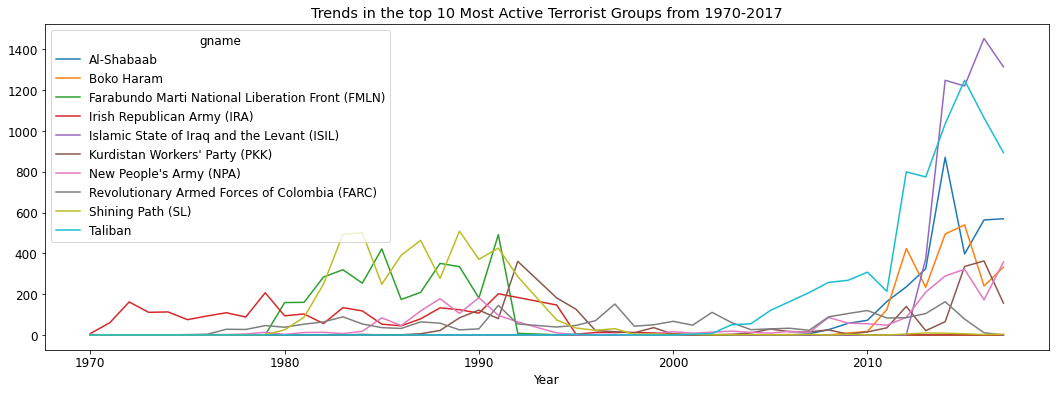

In [320]:
dfTerrorGroups=df[df.gname != "Unknown"]
dfTerrorGroups=dfTerrorGroups[dfTerrorGroups['gname'].isin(dfTerrorGroups.value_counts('gname').nlargest(10).index)]
dfTerrorGroups=pd.crosstab(dfTerrorGroups.Year, dfTerrorGroups.gname)

dfTerrorGroups.plot(figsize=(18, 6), 
           )
plt.title('Trends in the top 10 Most Active Terrorist Groups from 1970-2017')
plt.show()



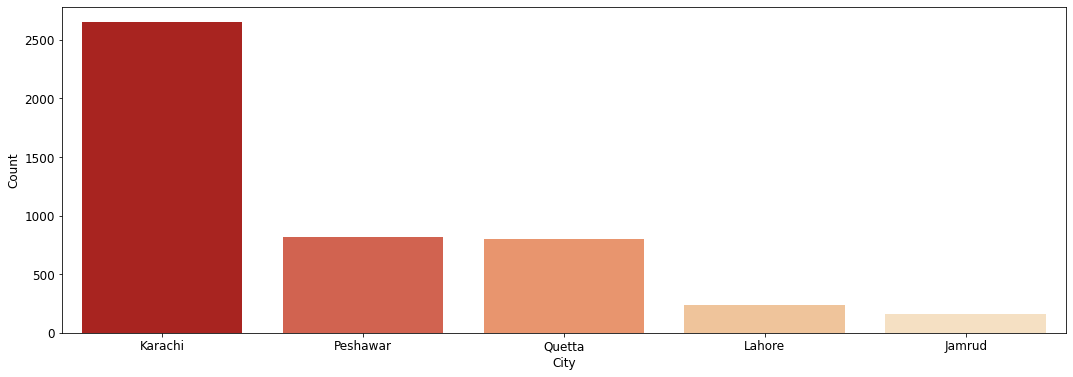

In [321]:
df10=df.groupby(['Country', 'City'])['City'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
df10 = df10.loc[df10['Country'] == 'Pakistan'].head()

plt.subplots(figsize=(18,6))
sns.barplot(
    x='City',
    y='Count', 
    data=df10,
    palette= 'OrRd_r')
plt.show()

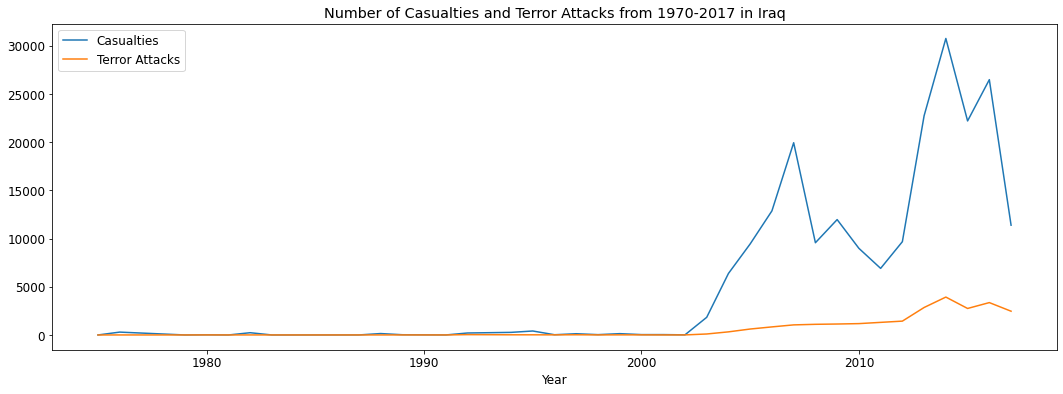

In [322]:
dfIraq=df.loc[df['Country']=='Iraq']
Number_Attacks=dfIraq['Year'].value_counts().sort_index(ascending=True).values
dfIraq_Grouped_YearCasualties=dfIraq.groupby(['Year'])['Casualties'].sum().reset_index()
dfIraq_Grouped_YearCasualties['Terror Attacks']=Number_Attacks
dfIraq_Grouped_YearCasualties=dfIraq_Grouped_YearCasualties.set_index('Year')

dfIraq_Grouped_YearCasualties.plot(figsize=(18, 6),           
            )
plt.title('Number of Casualties and Terror Attacks from 1970-2017 in Iraq')
plt.show()

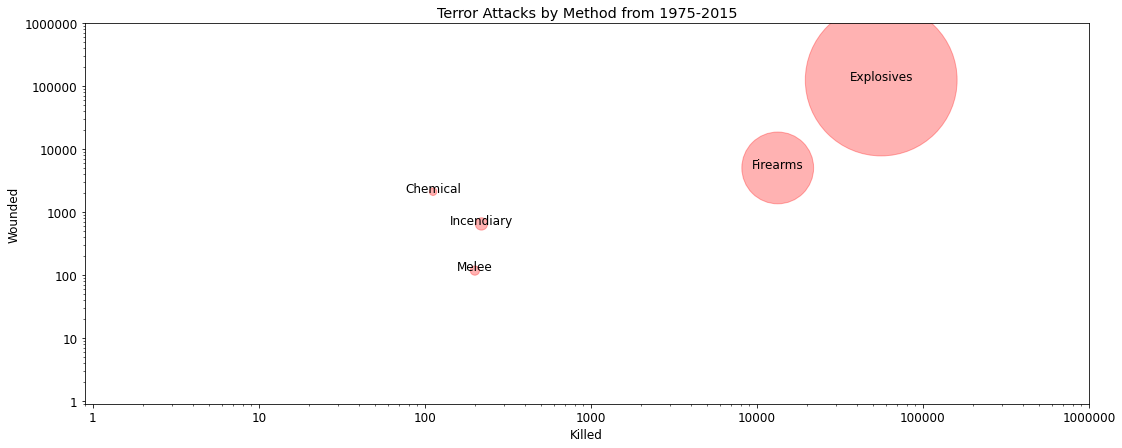

In [323]:
#X and Y axis. 
dfIraq_Grouped_TypeOfWeapon=dfIraq.groupby(['TypeOfWeapon'])['Killed', 'Wounded'].sum().reset_index()
dfIraq_Grouped_TypeOfWeapon=dfIraq_Grouped_TypeOfWeapon[dfIraq_Grouped_TypeOfWeapon.TypeOfWeapon != "Unknown"].reset_index()
dfIraq_Grouped_TypeOfWeapon.sort_values('TypeOfWeapon')

#Percentage of attacks by Type of Weapon
WeaponTypePercent=dfIraq.TypeOfWeapon.value_counts(normalize=True)*30000
WeaponTypePercent=WeaponTypePercent.drop(labels=['Unknown'])
WeaponTypePercent.sort_index(inplace=True)

#Parameters for scatter graph.
s=WeaponTypePercent
x=dfIraq_Grouped_TypeOfWeapon['Killed']
y=dfIraq_Grouped_TypeOfWeapon['Wounded']
colour="red"
alpha=0.3

#Plotting.
plt.figure(figsize=(18,7))
plt.rcParams.update({'font.size': 12})

#Axes
ax=plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Killed')
ax.set_ylabel('Wounded')
ax.set_xlim(left=0.00, right=1000000)
ax.set_ylim(bottom=0.00, top=1000000)

#Axes - Changing ticks from log to scalar, non-scientific notion
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(useOffset=False, style='plain')

#Labelling
a=dfIraq_Grouped_TypeOfWeapon.TypeOfWeapon
for i, txt in enumerate(a):
        ax.annotate(txt, (x[i], y[i]),ha='center')

ax.scatter(x, y, s, color=colour, alpha=alpha)

plt.title('Terror Attacks by Method from 1975-2015')

plt.show()

Size of circle represents relative proportion of all attacks 

In [324]:
us_states = np.asarray(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
                        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
                        'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
                        'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])

state_population = np.asarray([4858979, 738432, 6828065, 2978204, 39144818, 5456574,
                               3590886, 945934, 646449, 20271272, 10214860, 1431603,
                               1654930, 12859995, 6619680, 3123899, 2911641, 4425092,
                               4670724, 1329328, 6006401, 6794422, 9922576, 5489594,
                               2992333, 6083672, 1032949, 1896190, 2890845, 1330608,
                               8958013, 2085109, 19795791, 10042802, 756927, 11613423,
                               3911338, 4028977, 12802503, 1056298, 4896146, 858469,
                               6600299, 27469114, 2995919, 626042, 8382993, 7170351,
                               1844128, 5771337, 586107])

#hide cell 

In [325]:
df_usa = df[(df.Country == 'United States') &
                         (df.state != 'Puerto Rico') &
                         (df.state != 'U.S. Virgin Islands') &
                         (df.longitude < 0)]
df_usa['Day'].replace([0], 1, inplace= True)
df_usa['Date'] = pd.to_datetime(df_usa[['Day', 'Month', 'Year']])
df_usa = df_usa.drop_duplicates(['Date', 'latitude', 'longitude', 'Casualties'])

terror_perstate = np.asarray(df_usa.groupby('state').state.count())
terror_percapita = np.round(terror_perstate / state_population * 100000, 2)
terror_percapita[8] = round(terror_percapita[8] / 6, 2)
terror_scale = [[0, 'rgb(247, 200, 200)'], [1, 'rgb(245, 0, 0)']]

In [326]:
data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = terror_scale,
        showscale = False,
        locations = us_states,
        locationmode = 'USA-states',
        z = terror_percapita,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            )
        )]

layout = dict(
         title = 'Terrorist Attacks per 100,000 People in United States (1970-2018)',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

In [327]:
regions = list(set(df.RegionName))

region_mean_kills = []

for region in regions:
    region_mean_kills.append(df.Killed[df.RegionName == region].mean())

res = {regions[i]: region_mean_kills[i] for i in range(len(regions))}

df["region_mean"]=df['RegionName'].apply(lambda x: res.get(x))
df['nkill-mean'] = df['Killed'] - df['region_mean']
df['absnkill-mean'] = abs(df['nkill-mean'])

df.head()

def get_points(year, region = regions):
    points = df[['Year', 'latitude', 'longitude', 'Killed', 'region_mean', 'nkill-mean', 'absnkill-mean']][df.Year == year]
    return(points)

In [328]:
# fig = plt.figure(figsize = (10,8))
# def animate(Year):
#     ax = plt.axes()
#     ax.clear()
#     ax.set_title('Terrorism In Turkey '+'\n'+'Year:' +str(Year))
#     m5 = Basemap(projection='lcc',resolution='l',llcrnrlon=10,llcrnrlat=10,urcrnrlon=99,urcrnrlat=37,lat_0=15,lon_0=25)
#     lat_gif=list(df[df['Year']==Year].latitude)
#     long_gif=list(df[df['Year']==Year].longitude)
#     x_gif,y_gif=m5(long_gif,lat_gif)
#     m5.scatter(x_gif, y_gif,s=[killed+wounded for killed,wounded in zip(terror_turkey[terror_turkey['Year']==Year].Killed,terror_turkey[terror_turkey['Year']==Year].Wounded)],color = 'r')
#     m5.drawcoastlines()
#     m5.drawcountries()
#     m5.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
#     m5.drawmapboundary(fill_color='aqua')
# ani = animation.FuncAnimation(fig,animate,list(terror_turkey.Year.unique()), interval = 1500)    
# ani.save('animation.gif', writer='imagemagick', fps=1)
# plt.close(1)
# filename = 'animation.gif'
# video = io.open(filename, 'r+b').read()
# encoded = base64.b64encode(video)
# HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

NameError: name 'terror_turkey' is not defined

<Figure size 720x576 with 0 Axes>

In [329]:
df[df['Year']==Year].latitude

NameError: name 'Year' is not defined